In [1]:

import tensorflow as tf
from importlib import reload
import numpy as np
import os
from time import time
from simulation.simulator import Simulator
from simulation.architectures.mnist_architectures import nn_mnist_architecture
from simulation.architectures.mnist_architectures import cnn_mnist_architecture2
from simulation.architectures.cifar10_architectures import cnn_cifar10_architecture3
from simulation.architectures.cifar10_architectures import cnn_cifar10_architecture4
from tensorflow.examples.tutorials.mnist import input_data
from simulation.simulation_builder import graph_builder 
from simulation import simulator_utils as s_utils
reload(graph_builder)
GraphBuilder = graph_builder.GraphBuilder

import os
MNIST_DATAPATH = 'simulation/data/mnist/'
from simulation import summary_extractor as summ_ext
from importlib import reload
from simulation import simulator_utils as s_utils

def clean_dirs(dir_):
    """Recursively removes all train, test and validation summary files \
            and folders from previos training life cycles."""

    try:
        for file in os.listdir(dir_):
            if os.path.isfile(os.path.join(dir_, file)):
                os.remove(os.path.join(dir_, file))
            else:
                clean_dirs(os.path.join(dir_, file))

        os.rmdir(dir_)
    except OSError:
        # if first simulation, nothing to delete
        return



/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:

mnist = input_data.read_data_sets(MNIST_DATAPATH)
train_data = mnist.train.images
train_labels = mnist.train.labels
test_data = mnist.test.images
test_labels = mnist.test.labels
valid_data = mnist.validation.images
valid_labels = mnist.validation.labels

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting simulation/data/mnist/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting simulation/data/mnist/train-labels-idx1-ubyte.gz
Extracting simulation/data/mnist/t10k-images-idx3-ubyte.gz
Extracting simulation/data/mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
"""NN architecture"""


tuning_parameter_name = 'temp_factor'
tuning_parameter_vals = [
                         3.5, 
                        
                         ]
beta_0 = 800
description = "test"
n_experiments= len(tuning_parameter_vals)
n_simulations = 1
batch_size = 50
n_epochs = 100
swap_attempt_step = 100
surface_view = 'info'
n_replicas = 8
learning_rate = 0.01

burn_in_period = 2000
do_swaps=True


print(tuning_parameter_vals)
start_time = time()
for exp in range(n_experiments):
    experiment_name = s_utils.generate_experiment_name(architecture_name='nn',
        dataset='mnist', temp_ratio=tuning_parameter_vals[exp], optimizer='PTLD',
        do_swaps=do_swaps, swap_proba='boltzmann', n_replicas=n_replicas,
        surface_view=surface_view, beta_0=beta_0,
        loss_func_name='crossentropy', swap_attempt_step=swap_attempt_step,
        burn_in_period=burn_in_period, learning_rate=learning_rate)
    clean_dirs('simulation/summaries/' + experiment_name+ '_0/')
    clean_dirs('simulation/summaries/compressed/' + experiment_name+ '_0/')
    print('experiment:', exp+1, '/', n_experiments)
    name = experiment_name + '_' + str(exp)

    print(name)
    temp_factor = tuning_parameter_vals[exp]
    noise_list = [beta_0*temp_factor**i for i in range(n_replicas)]

    print(noise_list)
    
    sim = Simulator(nn_mnist_architecture, 
                    learning_rate, 
                    noise_list, 
                    'betas',
                    batch_size=batch_size, 
                    n_epochs=n_epochs, 
                    name=name,
                    n_simulations=n_simulations, 
                    swap_attempt_step=swap_attempt_step, 
                    temp_factor=temp_factor, 
                    tuning_parameter_name=tuning_parameter_name,
                    surface_view=surface_view,
                    description=description,
                    burn_in_period=burn_in_period,
                    loss_func_name='cross_entropy')


    sim.train(train_data=train_data, train_labels=train_labels,
            test_data=test_data, test_labels=test_labels, 
            validation_data=valid_data, validation_labels=valid_labels)
    print()
    print('time took:', (time() - start_time)/60.0, 'min')
    start_time = time()



[3.5]
experiment: 1 / 1
nn_mnist_3.5_PTLD_True_boltzmann_8_info_800_crossentropy_100_2000_0.01_v4_0
[800.0, 2800.0, 9800.0, 34300.0, 120050.0, 420175.0, 1470612.5, 5147143.75]
epoch:99, step:110000, 0.2395815,0.30348742,0.37291583,0.32634082,0.31543514,0.36677516,0.43804035,0.27595702, accept_ratio:0.5903614457831318, proba:0.5833912024404136         
time took: 10.221427726745606 min


3.5
best accuracy on test dataset: (17500.0, 0.029999971389770508)

cross entropy:
min_cross_valid_train: (24200.0, 0.003245116677135229)
min_cross_valid_test: (19000.0, 0.10264518857002258)
min_cross_valid_validation: (19100.0, 0.09860756993293762)
stun:
min_stun_train: (24200.0, 0.003239870071411133)
min_stun_test: (19000.0, 0.09755289554595947)
min_stun_validation: (19100.0, 0.09390175342559814)

accept_ratio: 0.5903614163398743


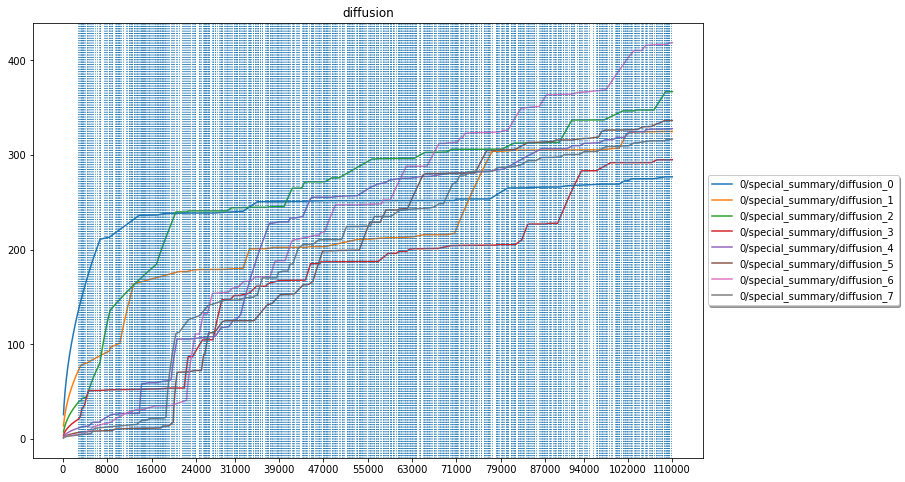

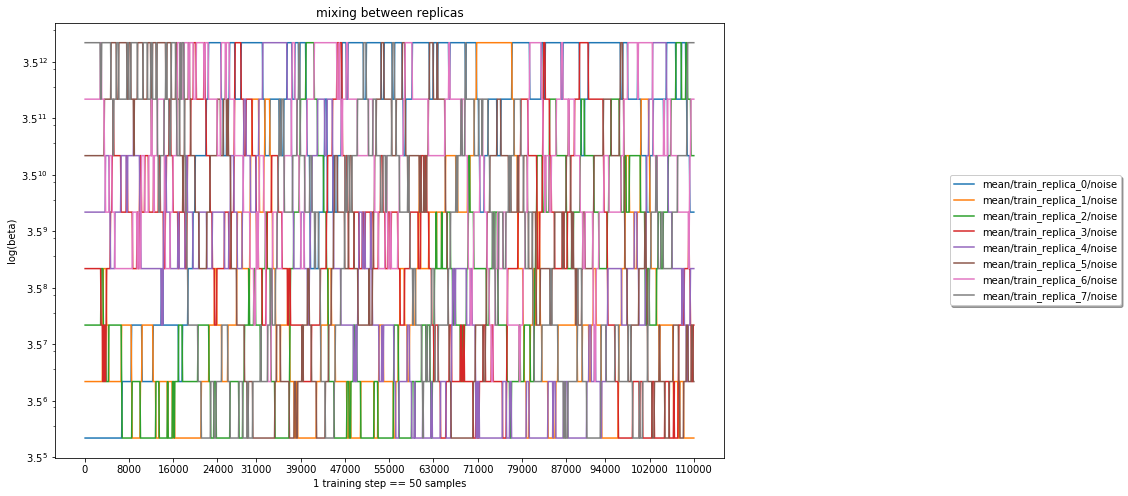

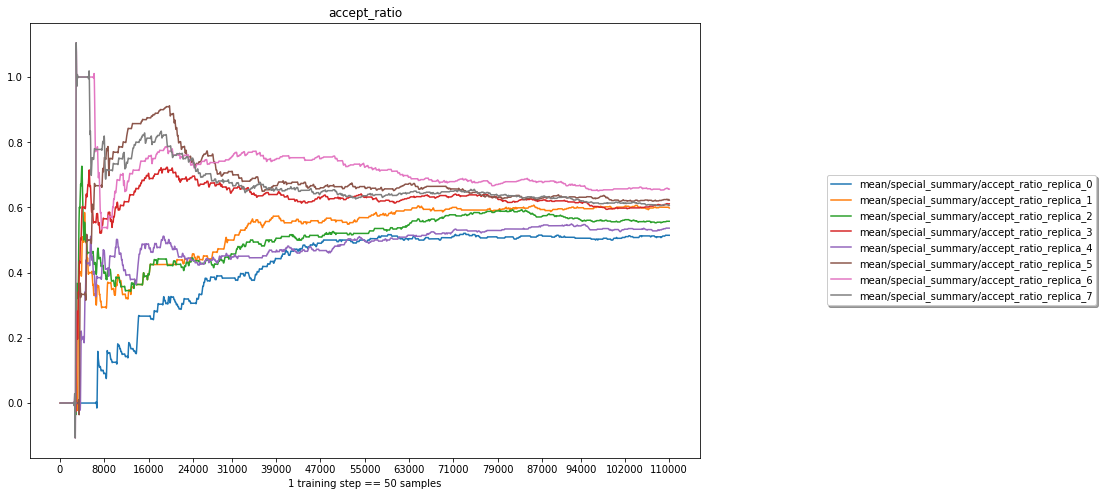

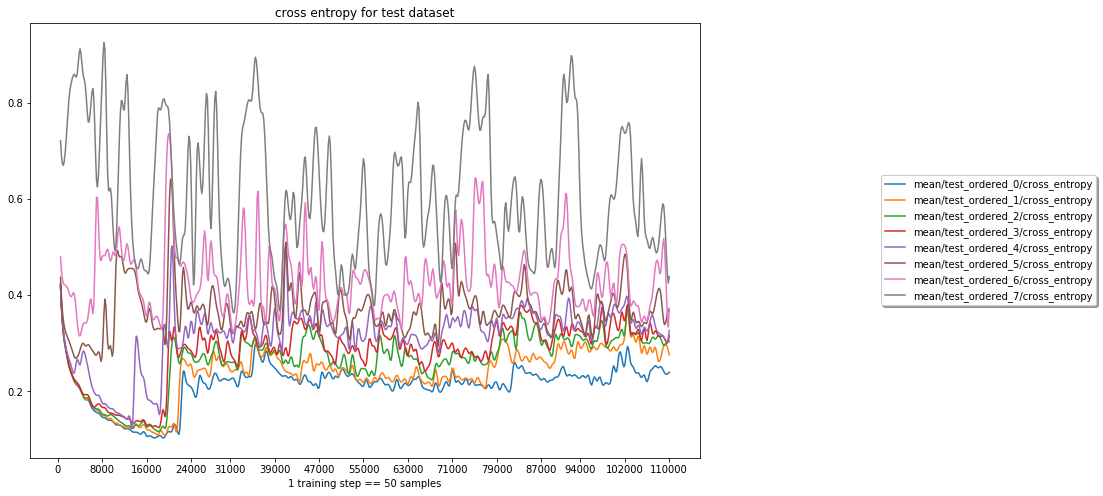

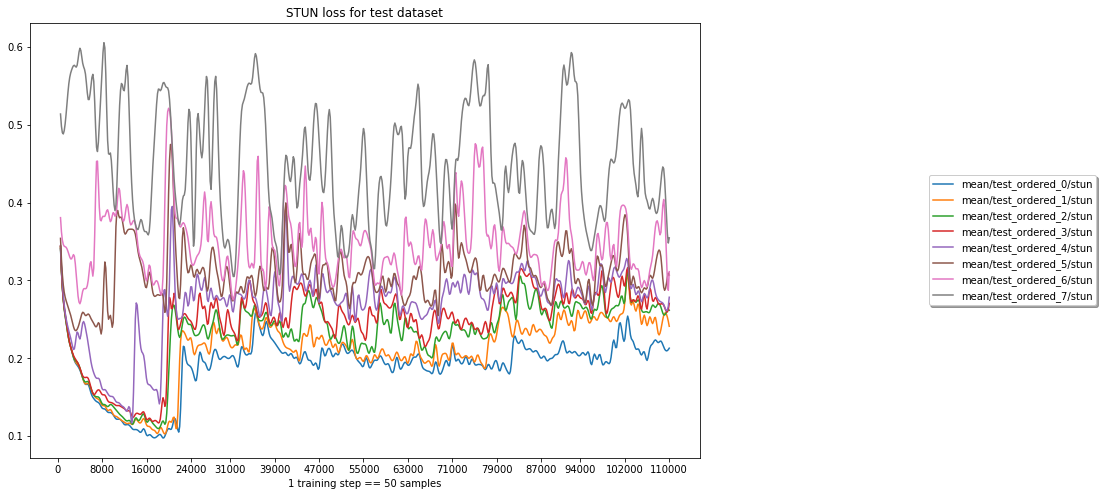

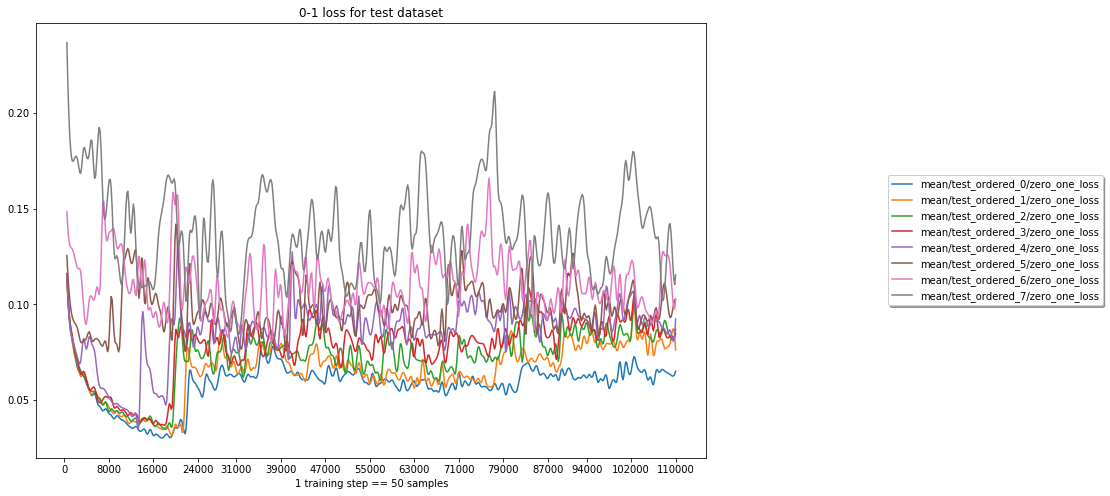

In [7]:

reload(summ_ext)
f = name
se = summ_ext.SummaryExtractor(f)
se.print_report()

